In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import tensorflow
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split , cross_val_score
#Create your first NLP in keras
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [6]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [7]:
#changing position of target column 'TEY'
Target = data['TEY']
#Drop the existing column
data.drop(labels=['TEY'], axis=1, inplace = True)
data.insert(0, 'Y' , Target)

data = data.rename({'Y':'TEY'}, axis = 1)

data.head(10)

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
5,114.72,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,10.626,3.4467,82.409
6,114.71,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,10.644,3.4874,82.440
7,114.71,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,10.656,3.6043,83.010
8,114.72,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,10.644,3.3943,82.284
9,131.70,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,11.679,1.9081,82.782


In [8]:
data.corr()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,0.988473,-0.541751,-0.102631
AT,-0.207495,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,0.146939,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.110272,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,0.717995,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,0.977042,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.891587,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,-0.720356,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,0.988473,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.541751,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


# feature selection by using mutual information Feature selection

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [10]:
x = data.iloc[:,1:]
y = data.iloc[:, 0 ]

In [11]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [12]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [43]:
#Feature selection
def select_feature(x_train, y_train,x_test):
    #configure to selet all features
    fs = SelectKBest(score_func = mutual_info_regression,k = 'all')
    #Learn relationship from training data
    fs.fit(x_train,y_train)
    #transform train input data
    x_train_fs = fs.transform(x_train)
    #tranform test input data
    x_test_fs = fs.transform(x_test)
    return x_train_fs,x_test_fs, fs

In [56]:

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
#feature selection
x_train_fs, x_test_fs, fs = select_feature(x_train, y_train, x_test)

Feature 0: 0.403262
Feature 1: 0.144307
Feature 2: 0.091335
Feature 3: 0.657359
Feature 4: 1.590263
Feature 5: 1.302356
Feature 6: 0.910073
Feature 7: 1.709683
Feature 8: 0.507028
Feature 9: 0.303243


<BarContainer object of 10 artists>

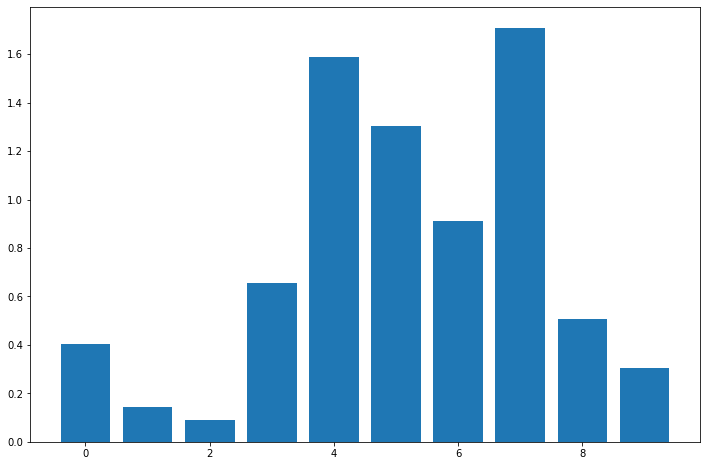

In [45]:
#What are the scores for the feature 
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
#plot the scores
fig, ax = plt.subplots(figsize= (12,8))
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)

# As per above feature selection method, we will select only features with good score to build our model 

In [67]:
x = data.drop(['TEY', 'AT', 'AP','AH', 'CO', 'NOX'], axis=1)
y = data.iloc[:,0]

In [71]:
x

,AFDP,GTEP,TIT,TAT,CDP
0,3.5000,19.663,1059.2,550.00,10.605
1,3.4998,19.728,1059.3,550.00,10.598
2,3.4824,19.779,1059.4,549.87,10.601
3,3.4805,19.792,1059.6,549.99,10.606
4,3.4976,19.765,1059.7,549.98,10.612
...,...,...,...,...,...
15034,3.5421,19.164,1049.7,546.21,10.400
15035,3.5059,19.414,1046.3,543.22,10.433
15036,3.4770,19.530,1037.7,537.32,10.483
15037,3.4486,19.377,1043.2,541.24,10.533


In [72]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

# Neural network model - backpropogation

In [74]:
from keras.models import Sequential 
from keras.layers import Dense

In [75]:
#Create model
model = Sequential()
model.add(Dense(10, input_dim=5,activation='relu', input_shape=(5,)))
model.add(Dense(6, activation= 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [76]:
#Compile model
model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mse'])

In [77]:
#fit the model
history = model.fit(x, y, validation_split=0.33,epochs=100, batch_size=40)


Epoch 1/100
252/252 [==============================] - 1s 2ms/step - loss: 18290.0254 - mse: 18290.0254 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 2/100
252/252 [==============================] - 0s 2ms/step - loss: 18290.0273 - mse: 18290.0273 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 3/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0234 - mse: 18290.0234 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 4/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0215 - mse: 18290.0215 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 5/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0215 - mse: 18290.0215 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 6/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0254 - mse: 18290.0254 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 7/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0234 - mse: 18290.0254 - 

Epoch 56/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0254 - mse: 18290.0254 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 57/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0254 - mse: 18290.0254 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 58/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0332 - mse: 18290.0332 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 59/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0312 - mse: 18290.0312 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 60/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0254 - mse: 18290.0254 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 61/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0254 - mse: 18290.0254 - val_loss: 17380.0645 - val_mse: 17380.0645
Epoch 62/100
252/252 [==============================] - 0s 1ms/step - loss: 18290.0156 - mse: 18290.

In [78]:
print(x_test_fs.shape)

(4963, 6)


In [79]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


470/470 [==============================] - 0s 811us/step - loss: 17989.7324 - mse: 17989.7324
mse: 1798973.24%


# Hyper parameter tuning

In [81]:
X = data.drop(['TEY','AT', 'AP','AH','CO','NOX'], axis= 1)
Y =data.iloc[:,0]

In [84]:
X

,AFDP,GTEP,TIT,TAT,CDP
0,3.5000,19.663,1059.2,550.00,10.605
1,3.4998,19.728,1059.3,550.00,10.598
2,3.4824,19.779,1059.4,549.87,10.601
3,3.4805,19.792,1059.6,549.99,10.606
4,3.4976,19.765,1059.7,549.98,10.612
...,...,...,...,...,...
15034,3.5421,19.164,1049.7,546.21,10.400
15035,3.5059,19.414,1046.3,543.22,10.433
15036,3.4770,19.530,1037.7,537.32,10.483
15037,3.4486,19.377,1043.2,541.24,10.533


In [85]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [86]:
# Standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [87]:
pd.DataFrame(X_standardized).describe().T

,count,mean,std,min,25%,50%,75%,max
0,15039.0,3.810001e-16,1.000033,-2.779497,-0.626693,-0.018541,0.461220,4.486233
1,15039.0,1.107344e-16,1.000033,-1.806771,-0.509146,-0.080757,0.422864,2.871006
2,15039.0,-2.324212e-15,1.000033,-5.021933,-0.254051,0.296554,0.738249,1.028678
3,15039.0,1.744899e-15,1.000033,-4.188141,-0.410115,0.571257,0.592868,0.662784
4,15039.0,3.640356e-16,1.000033,-1.992416,-0.435434,-0.070119,0.431168,2.700105


In [106]:
X_standardized

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

# Tuning of all hyperparameters

In [88]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [98]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
 model = Sequential()
 model.add(Dense(neuron1,input_dim = 5,kernel_initializer = init,activation = activation_function))
 model.add(Dropout(dropout_rate))
 model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
 model.add(Dropout(dropout_rate))
 model.add(Dense(1,activation = 'sigmoid'))

 adam = Adam(lr =learning_rate)
 model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
 return model

#Create the model
model= KerasClassifier(build_fn= create_model, verbose =0)

#Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu', 'tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
 activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)




In [100]:
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_standardized,Y)
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=  10.0s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=nan total time=  10.1s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning

KeyboardInterrupt: 